--- 

># **코드설명**

---

- 파 일 명 : 블랙 프라이데이 판매 예측 <br>
- 시작날짜 : 2021.11.25 <br>
- 수정날짜 : 2022.01.07 <br>
- 작 성 자 : 김혁진 <br>
- 작성주제 : DataHackaton / 블랙 프라이데이 판매 예측 <br>

--- 

- **참조**

  (1) 대회 홈페이지 : [DataHackaton](https://datahack.analyticsvidhya.com/contest/black-friday/#About) <br>
  (2) 하이퍼 파리미터 설명 : [Naver Blog](https://blog.naver.com/wideeyed/221333529176) <br>
  (3) Class문 설명 : [Github](https://zzsza.github.io/development/2020/07/05/python-class/) <br>
  (4) GPU 설정 : [Medium](https://medium.com/@am.sharma/lgbm-on-colab-with-gpu-c1c09e83f2af) <br>
  (5) RAM 모두사용으로 세션다운 : [Tistory](https://somjang.tistory.com/entry/Google-Colab-%EC%9E%90%EC%A3%BC%EB%81%8A%EA%B8%B0%EB%8A%94-%EB%9F%B0%ED%83%80%EC%9E%84-%EB%B0%A9%EC%A7%80%ED%95%98%EA%B8%B0)

---

- **고려사항** <br>
  (1) AutoEncoder로 파생변수 생성해보기 <br>
  (2) 하이퍼파라미터 탐색 : grid-search, bayesian-optimization, [optuna](https://dacon.io/competitions/official/235713/codeshare/2704?page=1&dtype=recent) <br>
  (3) RandomForest, XGBoost, Lightgbm, CatBoost 설명 [블로그](https://jhkim0759.tistory.com/12)

---

<br></br>
<br></br>
># **기본설정**

<br></br>
Query Start Time

In [1]:
import time
query_start_time = time.time()

<br></br>
garbage collect

In [2]:
import gc 
collected = gc.collect() 
print(collected)

0


<br></br>
Github 연동

In [3]:
# # 로그인
# git config --global user.email "hyuckjin12@naver.com"
# git config --global user.name  "hyuckjinkim"
# git config -l

# # 해당폴더로 들어가기
# cd 'E:/USB포맷_210223/Python/★PSC/1. 블랙 프라이데이 판매 예측(데이터 해커톤)'
# git init

# # 상태확인
# git status

# # 모든 파일 추가 후, commit
# git add .
# git commit -m 'new ipynb file'

# # 파일넣기
# cd 'E:/USB포맷_210223/Python/★PSC/1. 블랙 프라이데이 판매 예측(데이터 해커톤)'
# git remote rm origin
# git remote add origin https://github.com/hyuckjinkim/DataHackaton.git

# git push origin master

<br></br>
Markdown : Tabular Left Align

In [4]:
%%html
<style>
    table {float:left}
</style>

<br></br>
Jupyter Notebook Style : Theme, Display, TOC, ...

In [5]:
# # theme 설치
# !pip install jupyterthemes

# # jupyter notebook 최신버전
# !pip install --upgrade notebook

# # jupyter notebook 최신버전
# !pip install --upgrade jupyterthemes

# # 2.2.1. 테마바꾸기(customizing)
# # !jt -t onedork -fs 115 -nfs 125 -tfs 115 -dfs 115 -ofs 115 -cursc r -cellw 80% -lineh 115 -altmd  -kl -T -N

# # 2.2.3. 좌측 TOC 만들기
# # 출처 : https://gmnam.tistory.com/246
# !pip install jupyter_nbextensions_configurator
# !pip install jupyter_contrib_nbextensions

# !pip install nbconvert

# !pip install jupytext

# !pip install jupyter_contrib_nbextensions

# !jupyter nbextensions_configurator enable --user
# !jupyter contrib nbextension install --user
# !jupyter nbextension enable varInspector/main

# # 2.2.2. 쥬피터 노트북 화면 넓게 사용
# # 출처: https://taehooh.tistory.com/entry/Jupyter-Notebook-주피터노트북-화면-넓게-쓰는방법
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
# # 2.3.1 Google Drive Mount
# # (Google Drive 사용 시 설정)
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True) # 새로운 창에서 key 를 받아서 입력해야합니다. 

# # 2.3.2. 메모리 에러
# https://growingsaja.tistory.com/477

In [7]:
# # 2.3.3. GPU 사용 (6분)
# !git clone --recursive https://github.com/Microsoft/LightGBM
# !mkdir build
# %cd /content/LightGBM
# !cmake -DUSE_GPU=1 #avoid ..
# !make -j$(nproc)
# !sudo apt-get -y install python-pip
# !sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
# %cd /content/LightGBM/python-package

<br></br>
Install Modules

In [8]:
# !pip uninstall pandas -y
# !pip uninstall numpy  -y
# !pip uninstall lightgbm -y

# !pip install pandas==1.1.0
# !pip install numpy==1.21.2
# !pip install -U scikit-learn
# !pip install lightgbm --install-option=--gpu

# !pip install seaborn
# !pip install plotnine
# !pip install pandasql

# # lightgbm 에러떴는데, 콘다에서 실행하면 해결됨
# conda install -c conda-forge lightgbm 

# conda install -c conda-forge optuna

# # bayesian optimization 설치
# !pip install bayesian-optimization

# # xgboost 설치
# !pip install xgboost

# # catboost 설치
# !pip install catboost

# !pip install dill

# # pycaret 에러떴는데, --user 붙이니깐 해결됨
# !pip install --user pycaret

# !pip install qgrid
# !jupyter nbextension enable --py --sys-prefix qgrid

<br></br>
Import Modules

In [9]:
# jupyter notebook 전용
from tqdm.notebook import tqdm, trange
# from tqdm import tqdm

# basic modules
import pandas as pd
import numpy as np
import math
import warnings
import random
import os
import time
import itertools

import qgrid

# value_counts() 범용적인 버전
from collections import Counter as cnt

# save env.
import dill

# plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [11.7, 8.27] # [15, 10] # [11.7,8.27] - A4 size
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'

from plotnine import *


# sqldf
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())


# modeling
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import f1_score,make_scorer,r2_score,log_loss
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# import lightgbm
# !pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
import lightgbm as lgb

# Hyperparameter Optimization
from bayes_opt import BayesianOptimization
import optuna

<br></br>
Initial Values

In [10]:
# 2.5.1. Data Path
# jupyter.notebook : 'os.getcwd() + '/DAT/블랙 프라이데이 판매 예측/''
# google.colab     : '/content/drive/MyDrive/Python/4. 블랙프라이데이 판매예측/DAT/'
BASE_PATH = 'E:/USB_220114/Python'
DATA_PATH = BASE_PATH + '/DAT/7. 손동작 분류/'
OUT_PATH  = BASE_PATH + '/OUT/7. 손동작 분류/'

# 2.5.2. set seed
SEED = 777

# 2.5.3. plot
PLOT = False

# 2.5.5. missing check
MISSING_CHECK = False

# 2.5.6. interaction
INTERACTION_CHECK = False
INTERACTION = True

# 2.5.7. scaling
SCALE_CHECK = False
SCALE = False

# 2.5.8. lightgbm parameter
# 처음 (INIT_POINTS)회 랜덤 값으로 score 계산 후 (N_ITER)회 최적화
OBJECTIVE = ['binary','multiclass','regression'][1]
METRIC = ['auc','multi_logloss','binary_logloss','rmse'][1]

# initial value save
ini_var = [
    'SEED','PLOT','SCALE','INTERACTION','MISSING_CHECK','INTERACTION_CHECK',
    'OBJECTIVE','METRIC'
]

<br></br>
Set Off the Warning

In [11]:
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

<br></br>
User Defined Function

In [12]:
#-------------------------------------------------------------------------------------------------------#
# 2.6.1. Seed Fix
#-------------------------------------------------------------------------------------------------------#
def seed_everything(seed: int = 1):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)  # type: ignore
    # torch.backends.cudnn.deterministic = True  # type: ignore
    # torch.backends.cudnn.benchmark = True  # type: ignore


seed_everything(SEED)

#-------------------------------------------------------------------------------------------------------#
# 2.6.2. View all columns
#-------------------------------------------------------------------------------------------------------#
def View(data):

    pd.set_option('display.max_rows', 1000)
    pd.set_option('display.max_columns', 1000)
    pd.set_option('display.width', 1000)

    print(data)

    pd.set_option('display.max_rows', 0)
    pd.set_option('display.max_columns', 0)
    pd.set_option('display.width', 0)

#-------------------------------------------------------------------------------------------------------#
# 2.6.3. minmax function
#-------------------------------------------------------------------------------------------------------#
def minmax(x, digit=None):
    if digit is None:
        return min(x), max(x)
    else:
        return round(min(x), digit), round(max(x), digit)

#-------------------------------------------------------------------------------------------------------#
# 2.6.4. 컬럼dict에서 target 제거
#-------------------------------------------------------------------------------------------------------#
# - dict : 기준 dict
# - key  : 삭제할 key
#-------------------------------------------------------------------------------------------------------#
def rmkey(dict, key):
    tmp = dict.copy()
    del tmp[key]
    return tmp

#-------------------------------------------------------------------------------------------------------#
# 2.6.5. 교호작용항 추가
#-------------------------------------------------------------------------------------------------------#
# - data     : 기준 data
# - num_vari : 숫자형 변수 list
#-------------------------------------------------------------------------------------------------------#
def interaction_term(df, num_vari):

    data = df.copy()

    num_var = list(set(num_vari) - set(['id']))

    for i in range(0, len(num_var)):
        for j in range(i, len(num_var)):
            data[f'{num_var[i]}*{num_var[j]}'] = data[f'{num_var[i]}'] * \
                data[f'{num_var[j]}']

    return(data)

#-------------------------------------------------------------------------------------------------------#
# 2.6.6. color when print
#-------------------------------------------------------------------------------------------------------#
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

#-------------------------------------------------------------------------------------------------------#
# 2.6.7. density plot : histogram + density plot
#-------------------------------------------------------------------------------------------------------#
# - data : 기준 data
# - vars : hist + kde를 그릴 숫자형 변수
# - hue  : group화 변수
# - binwidth_adj_ratio : binwidth 조정 비율
#-------------------------------------------------------------------------------------------------------#
def density_plot(df, vars,
                 binwidths=None, hue=None,
                 binwidth_adj_ratio=None,
                 figsize=(15, 7)):

    from matplotlib.ticker import PercentFormatter

    data = df.copy()

    # 1) vars가 1개뿐일 때 에러발생
    #    -> 1개     : type = str
    #    -> 2개이상 : type = ndarray, ...
    if type(vars) == str:
        vars = [vars]

    # 2) plotting (nrow,ncol) 설정
    nrow = math.ceil(len(vars)**(1/2))
    ncol = nrow

    # 3) binwidths가 없을 때, binwidth 설정
    # 출처 : http://www.aistudy.co.kr/paper/pdf/histogram_jeon.pdf
    if binwidths is None:
        binwidths = []
        for col in data[vars].columns:
            n_bin = math.ceil(1 + 3.32*math.log10(len(data)))
            binwidth = (data[col].max() - data[col].min()) / n_bin
            binwidths.append(binwidth)
            del binwidth

    # 4) 설정한 binwidth를 조정하는 비율
    if binwidth_adj_ratio is not None:
        binwidths = [binwidth * binwidth_adj_ratio for binwidth in binwidths]

    fig = plt.figure(figsize=figsize)

    # 5) vars 별로 plot 생성
    for iter, var in enumerate(vars):

        binwidth = binwidths[iter]

        # (1) histogram
        ax1 = fig.add_subplot(nrow, ncol, iter+1)
        g1 = sns.histplot(data=data, x=var, hue=hue,
                          kde=True, stat='probability',
                          color='lightskyblue',
                          binwidth=binwidth, ax=ax1)
        ax2 = ax1.twinx()

        # (2) density plot
        g2 = sns.kdeplot(data=data, x=var, hue=hue,
                         color='red', lw=2, ax=ax2)
        # similir limits on the y-axis to align the plots
        ax2.set_ylim(0, ax1.get_ylim()[1] / binwidth)
        # ax2.yaxis.set_major_formatter(PercentFormatter(1 / binwidth))  # show axis such that 1/binwidth corresponds to 100%
        ax2.grid(False)

        # (3) density plot y축 없애기
        g2.set(yticklabels=[])
        g2.set(ylabel=None)
        g2.tick_params(right=False)

        a, b = divmod(iter, ncol)
        if b != 0:
            g1.set(ylabel=None)

    # 안겹치도록 설정
    fig.tight_layout()
    plt.show()

# example : density_plot(train, vars=num_vari)

#-------------------------------------------------------------------------------------------------------#
# 2.6.8. density plot : histogram + density plot
#
# (1) grp_var vs hue_var 막대그래프
# (2) grp_var(x축), hue_var에 따른 각 num_var들의 barplot, violineplot, box+swarmplot + kdeplot
#-------------------------------------------------------------------------------------------------------#
# - grp_var : x축 구분할 그룹변수 (text)
# - num_vari : 숫자형 변수 (list)
# - data : 기준 data
# - title_text : plot title (text)
# - hue_var : hue 그루핑변수
#-------------------------------------------------------------------------------------------------------#
def plot_num(grp_var, num_vari, df, title_text=None, hue_var=None, swarmplot=True,
             figsize_1=(3, 3), figsize_2=(15, 15)):

    data = df.copy()

    # (1)번 그래프 setting
    fig0 = plt.figure(figsize=figsize_1)
    ax0 = fig0.add_subplot(1, 1, 1)

    if title_text is None:
        title_text = grp_var

    plt.title(title_text, loc='left', pad=20, fontdict={'fontsize': 30,
                                                        'fontweight': 'bold',
                                                        'color': 'c'})

    # grp_var와 hue_var가 겹치는 경우, hue를 나누지 않음
    if (grp_var != hue_var) and (hue_var is not None):

        ct = pd.crosstab(data[grp_var], data[hue_var])
        ax = ct.plot(kind='bar', stacked=False, rot=0, ax=ax0)
        ax.legend(title=hue_var, bbox_to_anchor=(1, 1.02), loc='upper left')

    else:
        ct = data[grp_var].value_counts()
        ax = ct.plot(kind='bar', stacked=False, rot=0, ax=ax0)

    # show
    plt.xlabel('')
    plt.show()

    # 숫자변수중에 [grp,id]변수가 있으면 제외
    num_vari_x = list(set(num_vari) - set([grp_var, 'id']))

    # plt 생성
    if len(num_vari)>0:
        fig = plt.figure(figsize=figsize_2)
        plt.axis('off')  # 안끄면 x축에 0~1까지 축생김

        for iter, var in enumerate(num_vari_x):

            # hue랑 grp_var랑 같으면 hue를 넣지않음
            hue_x = [None if grp_var == hue_var else hue_var][0]

            # (n,4) plot
            ax1 = fig.add_subplot(len(num_vari_x), 4, 4*iter+1)
            ax2 = fig.add_subplot(len(num_vari_x), 4, 4*iter+2)
            ax3 = fig.add_subplot(len(num_vari_x), 4, 4*iter+3)
            ax4 = fig.add_subplot(len(num_vari_x), 4, 4*iter+4)

            # ---------------------------------------------------------------------------------------------
            # (2-1) 3번째 : box + swarm plot (ylim가져오기위해서 제일 먼저 실행)
            # ---------------------------------------------------------------------------------------------
            if swarmplot:
                g11 = sns.swarmplot(x=grp_var, y=var, data=data,
                                    ax=ax3, color='crimson', marker='*', s=7)
            g12 = sns.boxplot(x=grp_var, y=var, data=data, ax=ax3)
            g12.set(ylabel=None)
            g12.set(yticklabels=[])

            # ---------------------------------------------------------------------------------------------
            # (2-2) 1번째 : barplot
            # ---------------------------------------------------------------------------------------------
            ax1.set_ylim(ax3.get_ylim())
            g21 = sns.barplot(x=grp_var, y=var, data=data, ax=ax1, hue=hue_x)
            # g21.set(ylabel=None)
            # g21.set(yticklabels=[])
            # g21.axes.set_title(str(iter+1) + ':' + var, fontsize=20, weight='bold', ha='left', x=-.05)
            g21.set_ylabel(var, fontsize=20)

            # ---------------------------------------------------------------------------------------------
            # (2-3) 2번째 : violinplot
            # ---------------------------------------------------------------------------------------------
            ax2.set_ylim(ax3.get_ylim())
            g31 = sns.violinplot(x=grp_var, y=var, data=data,
                                 ax=ax2, legend=False, hue=hue_x)
            g31.set(ylabel=None)
            g31.set(yticklabels=[])

            # ---------------------------------------------------------------------------------------------
            # (2-4) 4번째 : density plot
            # ---------------------------------------------------------------------------------------------
            ax4.set_ylim(ax3.get_ylim())
            g41 = sns.kdeplot(y=var, hue=grp_var, data=data, ax=ax4)
            g41.set(ylabel=None)
            g41.set(yticklabels=[])
            g41.tick_params(right=False)
            g41.set(xlabel=None)
            g41.set(xticklabels=[])

            # 맨 아래에만 x축이 생성되도록 setting
            if (iter+1) != len(num_vari_x):

                g12.set(xlabel=None)
                g12.set(xticklabels=[])

                g21.set(xlabel=None)
                g21.set(xticklabels=[])

                g31.set(xlabel=None)
                g31.set(xticklabels=[])

        fig.tight_layout()
        plt.show()

# # example
# plot_num(grp_var = 'sex', num_vari = num_vari, hue_var = 'target',
#          data = train, title_text = 'sex')


#-------------------------------------------------------------------------------------------------------#
# 2.6.9. onehot encoding
#-------------------------------------------------------------------------------------------------------#
#- data
#- col_types
#- ignore_features
#-------------------------------------------------------------------------------------------------------#
def onehot_encoding(df, cat_type, ignore_features=['']):

    data = df.copy()

    cols = setdiff(data.columns, ignore_features + ['target'])
    cols = df.select_dtypes(include=[cat_type]).columns

    res_df = pd.get_dummies(data, columns=cols)

    return(res_df)


#-------------------------------------------------------------------------------------------------------#
# 2.6.11. setdiff
#-------------------------------------------------------------------------------------------------------#
def setdiff(x, y):
    return(list(set(x)-set(y)))


#-------------------------------------------------------------------------------------------------------#
# 2.6.12. automl_comp
#-------------------------------------------------------------------------------------------------------#
# missing value를 auto ml로 예측하기위함
# target이 missing인 값들을 제외하고, kfold cv를 통해서 각 알고리즘들의 scoring을 계산

# # cross_val_score에서 쓸 수 있는 scoring
# list(sklearn.metrics.SCORERS.keys())
def AUTOML_COMP(train,
                target,
                objective,
                iterations=100,
                scoring=None,
                test=None,
                ignore_features=None,
                n_splits=10,
                fit_model=False):

    # copy
    X_train = train.drop([target], axis=1)
    y_train = train[target]
    if test is not None:
        X_test = test.drop([target], axis=1)
        y_test = test[target]

    # remove needless features
    if ignore_features is not None:
        features = list(set(X_train.columns)-set(ignore_features))
    else:
        features = list(X_train.columns)

    # 모형적합
    start_time = time.time()

    # binary / regression
    models = []
    if objective == 'binary':

        if scoring is None:
            scoring = 'accuracy'

        models.append(('LR', LogisticRegression(
            solver='liblinear', multi_class='ovr', random_state=SEED)))
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
        models.append(('NB', GaussianNB()))  # Gaussian Naive Bayes
        models.append(('SVM', SVC(gamma='auto', random_state=SEED)))
        models.append(('RFC', RandomForestClassifier(random_state=SEED)))
        models.append(('XGBC', XGBClassifier(
            iterations=iterations, verbosity=0, random_state=SEED)))
        models.append(('LGBMC', LGBMClassifier(random_state=SEED)))
        models.append(('AdaC', AdaBoostClassifier(random_state=SEED)))
        models.append(('Cat', CatBoostClassifier(
            iterations=iterations, silent=True, random_state=SEED)))

    elif objective == 'regression':

        if scoring is None:
            scoring = 'neg_mean_squared_error'

        models.append(('LR', LinearRegression()))
        models.append(('RIDGE', RidgeClassifier()))
        models.append(('LASSO', Lasso(random_state=SEED)))
        models.append(('KNN', KNeighborsRegressor()))
        models.append(('CART', DecisionTreeRegressor(random_state=SEED)))
        models.append(('EN', ElasticNet(random_state=SEED)))
        models.append(('SVM', SVR()))
        models.append(('RFR', RandomForestRegressor(random_state=SEED)))
        models.append(('XGBR', XGBRegressor(
            iterations=iterations, verbosity=0, random_state=SEED)))
        models.append(('LGBMR', LGBMRegressor(random_state=SEED)))
        models.append(('AdaR', AdaBoostRegressor(random_state=SEED)))
        models.append(('Cat', CatBoostRegressor(
            iterations=iterations, silent=True, random_state=SEED)))

    # kfold cross validation
    if fit_model:

        results = []
        names = []
        msgs = []

        pbar = tqdm(models)
        for name, model in pbar:
            pbar.set_description(f'fitting... ({name})')

            kfold = KFold(n_splits=n_splits, random_state=SEED, shuffle=True)
            cv_results = cross_val_score(model,
                                         X=X_train,
                                         y=y_train,
                                         cv=kfold,
                                         scoring=scoring,
                                         verbose=0)
            results.append(cv_results)
            names.append(name)
            msgs.append((name, cv_results.mean(), cv_results.std()))

        end_time = time.time()
        running_time = (end_time - start_time)/60
        running_time = f'{running_time:.1f} Mins'

    ret = {}

    ret['X_train'] = X_train
    ret['y_train'] = y_train

    if fit_model:
        ret['run_time'] = running_time
        ret['message'] = msgs
        ret['model'] = models
        ret['cv_result'] = results

    if test is not None:
        ret['X_test'] = X_test

    return(ret)


def AUTO_COMP_PLOT(object, title='Algorithm Comparision'):

    cv_res_df = pd.DataFrame(
        np.transpose(object['cv_result']),
        columns=[name for name, model in object['model']]
    )

    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(111)
    p = sns.boxplot(data=cv_res_df)
    p = sns.swarmplot(data=cv_res_df, marker='*', s=7, color='crimson')
    p.set_title(title, fontsize=20)
    plt.show()

#-------------------------------------------------------------------------------------------------------#
# 2.6.13. score function
#-------------------------------------------------------------------------------------------------------#
def mape_fn(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape


def rmse_fn(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)


def r2_fn(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return(r2)

 
#-------------------------------------------------------------------------------------------------------#
# 2.6.14. abline
#-------------------------------------------------------------------------------------------------------#
def abline(intercept,slope,linewidth=2,linestyle='--',color='red'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, linestyle=linestyle, linewidth=linewidth, color=color)

<br></br>
버전 확인

In [13]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


<br></br>
<br></br>
># **Data**

데이터를 제공한 회사는 ABC Private Limited로 소매회사임. \
회사설명 : 작물 재배, 시장 원예, 원예(Growing of crops, market gardening, horticulture) [Link](https://www.zaubacorp.com/company/A-B-C-PRIVATE-LIMITED/U01110MH1950PTC008007)

변수정보 (변수명 참조 : [DataHackaton](https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement))

|변수명 | 변수정보 |
|:---:|:---|
| User_ID | 사용자 ID |
| Product_ID | 제품 ID |
| Gender | 사용자의 성별 |
| Age | 나이(구간) |
| Occupation | 직업(마스킹됨) |
| City_Category | 도시의 범주(A,B,C) |
| Stay_In_Current_City_Years | 현재 도시에 체류한 기간 |
| Marital_Status | 결혼 여부 |
| Product_Category_1 | 제품 카테고리 (마스킹됨) |
| Product_Category_2 | 제품 카테고리2(마스킹됨,다른 카테고리에도 속할 수 있음) |
| Product_Category_3 | 제품 카테고리3(마스킹됨,다른 카테고리에도 속할 수 있음) |
| Purchase | 구매금액(Target) |

<br></br>
## Data Load

In [14]:
# Train Data Load (550,068 rows, 12 columns)
train = pd.read_csv(DATA_PATH + 'train.csv')
test  = pd.read_csv(DATA_PATH + 'test.csv')
sub   = pd.read_csv(DATA_PATH + 'sample_submission.csv')

train

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,2331,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,2332,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,2333,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,2334,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


<br></br>
Column 명 변경

In [20]:
COL_NAME = {
}

train2 = train.rename(columns=COL_NAME)
test2  = test .rename(columns=COL_NAME)
sub2   = sub  .rename(columns=COL_NAME)

<br></br>
Type 변경

In [21]:
type_change_var = ['id','target']

for var in type_change_var:
    train2[var] = train2[var].astype(str)
    
    if (var in test2.columns):
        test2[var] = test2[var].astype(str)

<br></br>
## Missing Check

In [22]:
def missing_column_check(data, wording):
    
    df = data.copy()
    
    cnt_df = df.apply(lambda x: x.replace(' ','').replace('nan','').replace('null','')).\
        isnull().sum()

    total_df = pd.DataFrame(cnt_df.copy(), columns=['total_count'])
    total_df['total_count'] = df.shape[0]

    total_percent_df = round((cnt_df / df.shape[0])*100,2)

    missing_df = pd.concat([cnt_df, total_df, total_percent_df],axis=1).\
        rename(columns={0:'missing_count',1:'percentage'}).\
        query('missing_count > 0')
    
    print(f'{color.BOLD}{color.BLUE}{wording} : {color.END}\n{missing_df}\n')
    
missing_column_check(train2, wording = '> train')
missing_column_check(test2 , wording = '> test')

> train : 
Empty DataFrame
Columns: [missing_count, total_count, percentage]
Index: []

> test : 
Empty DataFrame
Columns: [missing_count, total_count, percentage]
Index: []



In [23]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2335 non-null   object 
 1   sensor_1   2335 non-null   float64
 2   sensor_2   2335 non-null   float64
 3   sensor_3   2335 non-null   float64
 4   sensor_4   2335 non-null   float64
 5   sensor_5   2335 non-null   float64
 6   sensor_6   2335 non-null   float64
 7   sensor_7   2335 non-null   float64
 8   sensor_8   2335 non-null   float64
 9   sensor_9   2335 non-null   float64
 10  sensor_10  2335 non-null   float64
 11  sensor_11  2335 non-null   float64
 12  sensor_12  2335 non-null   float64
 13  sensor_13  2335 non-null   float64
 14  sensor_14  2335 non-null   float64
 15  sensor_15  2335 non-null   float64
 16  sensor_16  2335 non-null   float64
 17  sensor_17  2335 non-null   float64
 18  sensor_18  2335 non-null   float64
 19  sensor_19  2335 non-null   float64
 20  sensor_2

Missing 없음

<br></br>
<br></br>
># **EDA**

<br></br>
## Column Type 확인

In [24]:
train2.head(5)

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [25]:
train2.apply(lambda x: x.nunique())

id           2335
sensor_1     2335
sensor_2     2335
sensor_3     2335
sensor_4     2335
sensor_5     2335
sensor_6     2335
sensor_7     2335
sensor_8     2335
sensor_9     2335
sensor_10    2335
sensor_11    2335
sensor_12    2335
sensor_13    2335
sensor_14    2335
sensor_15    2335
sensor_16    2335
sensor_17    2335
sensor_18    2335
sensor_19    2335
sensor_20    2335
sensor_21    2335
sensor_22    2335
sensor_23    2335
sensor_24    2335
sensor_25    2335
sensor_26    2335
sensor_27    2335
sensor_28    2335
sensor_29    2335
sensor_30    2335
sensor_31    2335
sensor_32    2335
target          4
dtype: int64

손동작은 4개이고, 나머지는 센서값 <br></br>



### 숫자형 변수

In [26]:
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_1,2335.0,-1.122174,11.486353,-94.746969,-4.036597,-0.951398,2.895540,68.876142
sensor_2,2335.0,-1.024673,7.399859,-63.942094,-4.031957,-1.015582,2.140456,39.913391
sensor_3,2335.0,-0.672769,26.519159,-122.195138,-14.878500,-0.961088,13.974075,127.124171
sensor_4,2335.0,-0.147724,15.551500,-111.870691,-7.116633,-0.890469,6.110973,102.015561
sensor_5,2335.0,-0.327494,11.461970,-94.147972,-3.968687,-0.871690,2.970387,89.059852
sensor_6,2335.0,-0.423462,7.314322,-70.916786,-3.957699,-0.804810,3.006144,34.923040
sensor_7,2335.0,0.676275,26.869479,-105.956553,-13.937806,0.058910,13.934438,120.046277
sensor_8,2335.0,-0.936019,15.598104,-102.965354,-8.053214,-1.095551,4.955494,125.160611
sensor_9,2335.0,-0.797432,12.015022,-81.268085,-4.031148,-0.944613,2.235557,74.101715
sensor_10,2335.0,-0.704585,7.384626,-47.937561,-3.983620,-0.932964,2.883284,47.030119


In [27]:
train2.\
    select_dtypes(include=[int,float]).\
    apply(lambda x: minmax(x,digit=2)).\
    T

,0,1
sensor_1,-94.75,68.88
sensor_2,-63.94,39.91
sensor_3,-122.20,127.12
sensor_4,-111.87,102.02
sensor_5,-94.15,89.06
sensor_6,-70.92,34.92
sensor_7,-105.96,120.05
sensor_8,-102.97,125.16
sensor_9,-81.27,74.10
sensor_10,-47.94,47.03


<br></br>
### 문자형 변수

In [28]:
n_head = 5

pd.concat([
    train2.select_dtypes(include=[object]).apply(lambda x: x.nunique()),
    train2.select_dtypes(include=[object]).apply(lambda x: sorted(x.unique())[:n_head])
],axis=1).rename(columns={0:'nunique',1:f'head{n_head}'})

,nunique,head5
id,2335,"[1, 10, 100, 1000, 1001]"
target,4,"[0, 1, 2, 3]"


In [29]:
# def fixtype(data, num_var, char_var):
    
#     df = data.copy()
    
#     num_var  = list(set(data.columns) & set(num_var))
#     char_var = list(set(data.columns) & set(char_var))

#     # (1) dictionary for column type 
#     num_dict  = dict([(var,float) for var in num_var])
#     char_dict = dict([(var,str  ) for var in char_var])
#     all_dict = {**num_dict, **char_dict}
    
#     # (2) float를 str로 변환 시, 소수점이 사라지지 않음. 이를 보정
#     var_float2int = np.array(df.dtypes == float) & ([type == np.str for var,type in all_dict.items()])
#     var_float2int = df.columns[var_float2int]
    
#     var_float2int_dict = dict([(var,np.int64) for var in var_float2int])

#     # (3) na값을 -9999.9999로 변환 후, 나중에 이를 다시 nan으로 변환
#     result = df.\
#         fillna('-99999999').\
#         astype(var_float2int_dict).\
#         astype(all_dict).\
#         replace('-99999999',np.nan)
    
#     return(result)

# # target을 제외한 나머지 값들은 모두 characteristic variable
# num_var  = ['target']
# char_var = setdiff(train2.columns, num_var)

# train2 = fixtype(train2, num_var, char_var)
# test2  = fixtype(test2 , num_var, char_var)

In [30]:
train2.dtypes

id            object
sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_16    float64
sensor_17    float64
sensor_18    float64
sensor_19    float64
sensor_20    float64
sensor_21    float64
sensor_22    float64
sensor_23    float64
sensor_24    float64
sensor_25    float64
sensor_26    float64
sensor_27    float64
sensor_28    float64
sensor_29    float64
sensor_30    float64
sensor_31    float64
sensor_32    float64
target        object
dtype: object

In [31]:
train2.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


<br></br>
## 유형별 변수 개수 확인

In [32]:
num_df  = train2.select_dtypes(include=[int,float])
char_df = train2.select_dtypes(exclude=[int,float])

print('전체 변수 :', train2 .shape[1])
print('숫자 변수 :', num_df .shape[1], '\t-', np.array(num_df .columns))
print('문자 변수 :', char_df.shape[1], '\t-', np.array(char_df.columns))

전체 변수 : 34
숫자 변수 : 32 	- ['sensor_1' 'sensor_2' 'sensor_3' 'sensor_4' 'sensor_5' 'sensor_6'
 'sensor_7' 'sensor_8' 'sensor_9' 'sensor_10' 'sensor_11' 'sensor_12'
 'sensor_13' 'sensor_14' 'sensor_15' 'sensor_16' 'sensor_17' 'sensor_18'
 'sensor_19' 'sensor_20' 'sensor_21' 'sensor_22' 'sensor_23' 'sensor_24'
 'sensor_25' 'sensor_26' 'sensor_27' 'sensor_28' 'sensor_29' 'sensor_30'
 'sensor_31' 'sensor_32']
문자 변수 : 2 	- ['id' 'target']


<br></br>
## Characteristic Variable

In [33]:
n_head = 10
df = char_df

pd.concat([
    df.apply(lambda x: x.dropna().nunique()),
    df.apply(lambda x: sorted(x.dropna().unique())[:n_head])
],axis=1).rename(columns={0:'nunique',1:f'head{n_head}'})

,nunique,head10
id,2335,"[1, 10, 100, 1000, 1001, 1002, 1003, 1004, 100..."
target,4,"[0, 1, 2, 3]"


<br></br>
### 문자형 변수 짧게 변경

In [34]:
def abbreviate_char(_df):
    df = _df.copy()
    
    return df

train3 = abbreviate_char(train2)
test3  = abbreviate_char(test2)

<br></br>
### Plot : 1-Dimension

barplot

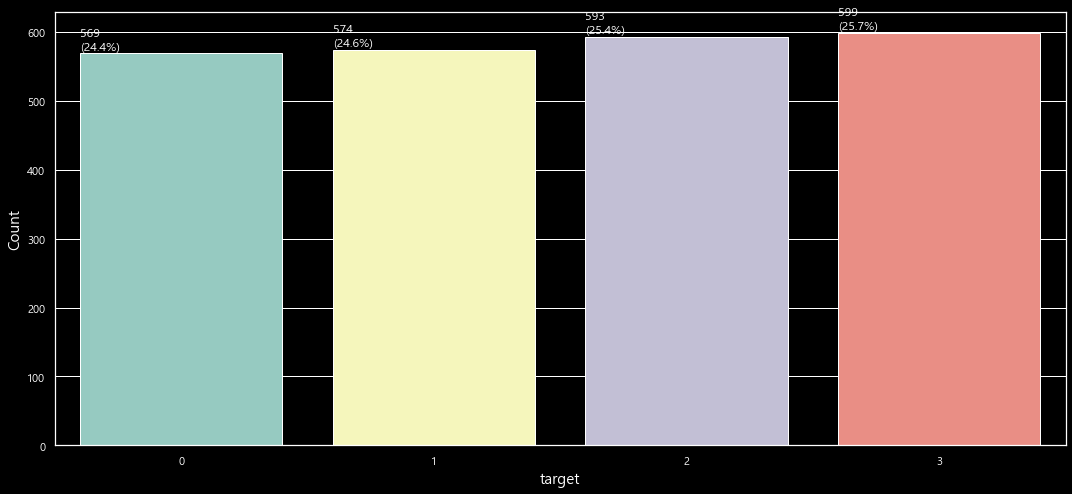

In [35]:
plot_char_vari = setdiff(char_df.columns,['id'])
adj_x = 0.0
adj_y = 5.0

fig = plt.figure(figsize=(15*1,7*1))
ncol = 1
nrow = np.ceil(len(plot_char_vari)/ncol)

iter=0
for var in sorted(plot_char_vari):
    iter+=1
    
    # ordering
    unique_x = train3[var].dropna().unique()
    type_x   = train3[var].dtype
    
    if type_x in [np.int64, np.float64]:
        order_x = sorted(unique_x)
    else:
        try:
            order_x = [str(x) for x in sorted(unique_x.astype(int))]
        except ValueError:
            order_x = sorted(unique_x)
        
    fig.add_subplot(nrow,ncol,iter)
    ax = sns.countplot(train3[var],
                       order = order_x)
    ax.set_xlabel(var, size=15)
    ax.set_ylabel('Count',size=15)

    for p in ax.patches:
        count_x = p.get_height()
        sum_x   = sum([p.get_height() for p in ax.patches])
        ratio_x = ( p.get_height() / sum_x )*100
        ann_x   = f'{count_x:,}\n({ratio_x:.1f}%)'
        ax.annotate(ann_x, (p.get_x() + adj_x, p.get_height() + adj_y), size = 12, color='white')
    
fig.tight_layout()
plt.show()

|변수명 | 정보 |
|:---:|:---|
| target | 빈도가 거의 비슷함 |


<br></br>
### Plot : 2-Dimension

문자열 조합의 개수

In [36]:
# n_comb = math.comb(len(plot_char_vari),2)
# ncol = math.ceil(np.sqrt(n_comb))
# nrow = math.ceil(n_comb/ncol)

# print(f'n_comb : {n_comb}, (nrow,ncol) : ({nrow},{ncol})')

<br></br>
cross table

In [37]:
# check_var = setdiff(plot_char_vari,['id'])
# n_comb = math.comb(len(check_var),2)

# ncol = math.ceil(np.sqrt(n_comb))
# nrow = math.ceil(n_comb/ncol)

# comb = list(itertools.product([True, False], repeat=len(check_var)))
# comb = [x for x in comb if sum(x)==2]

# for iter,c in enumerate(comb):
#     xvar,yvar = np.array(check_var)[[c]]
#     print(color.BOLD+color.BLUE+f'> ({iter+1}/{len(comb)}) ({xvar},{yvar})'+color.END)
    
#     View(pd.crosstab(train3[xvar].fillna('nan'),
#                      train3[yvar].fillna('nan')))
#     print('\n')

<br></br>
모든 문자형변수 조합의 2D plot

In [38]:
# if PLOT:

#     check_var = setdiff(plot_char_vari,['prod_cat_1','prod_cat_2','prod_cat_3'])
    
#     n_comb = math.comb(len(check_var),2)

#     ncol = math.ceil(np.sqrt(n_comb))
#     nrow = math.ceil(n_comb/ncol)

#     comb = list(itertools.product([True, False], repeat=len(check_var)))
#     comb = [x for x in comb if sum(x)==2]

#     fig  = plt.figure(figsize=(15*3,7*4))

#     tick_size      = 40
#     label_size     = 40
#     freq_font_size = 30
#     title_size     = 50
#     legend_size    = 30

#     p1_iter = 0
#     change_row = 0
#     for iter,c in enumerate(comb):

#         if change_row==(ncol):
#             change_row  = 1 # go back
#             p1_iter    += ncol+1
#         else:
#             change_row += 1
#             p1_iter    += 1

#         p2_iter = p1_iter+ncol

#         # # check
#         # print(f'change_row : {change_row}, p1_iter : {p1_iter}, p2_iter : {p2_iter}')

#         xvar,yvar = np.array(check_var)[[c]]

#         # (1) crosstab plot
#         fig.add_subplot(2*nrow, ncol, p1_iter)
#         ct = pd.crosstab(train3[xvar],train3[yvar]).sort_index(level=0, ascending=True).sort_index(level=1, ascending=True)
#         p0 = sns.heatmap(ct.T, annot=True, fmt='.0f', cbar=False, annot_kws={"size": freq_font_size}, cmap='YlGnBu')
#         p0.tick_params(axis = 'y', labelsize=tick_size)
#         p0.tick_params(axis = 'x', labelsize=0)
#         p0.set_title('-'*27 + f'{iter+1}' + '-'*27,fontsize=title_size)
#         p0.set_xlabel('')
#         p0.set_ylabel(f'{yvar}',fontsize=label_size)

#         # (2) count plot
#         fig.add_subplot(2*nrow, ncol, p2_iter)
#         p1 = sns.countplot(train3[xvar], hue = train3[yvar], dodge=True, palette = 'Set1',
#                            order     = sorted(train3[xvar].value_counts().index),
#                            hue_order = sorted(train3[yvar].value_counts().index))
#         p1.tick_params(labelsize=tick_size)
#         p1.set_xlabel(f'{xvar}',fontsize=label_size)
#         p1.set_ylabel('Count',fontsize=label_size)
#         p1.get_legend().remove()
#         #plt.legend(bbox_to_anchor=(1.02, 1), 
#         #           loc=2, borderaxespad=0, fontsize=legend_size)

# #         # show freq. into plot
# #         values=train3[xvar].value_counts().values
# #         for j, g1 in enumerate(p1.patches):
# #             p1.annotate(f'\n{g1.get_height()}', (g1.get_x()+0.13, g1.get_height()+1.1), ha='center', va='top', color='white', size=freq_font_size)

#     fig.tight_layout()
#     plt.show()

<br></br>
## Numeric Variable

In [39]:
round(train3.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
sensor_1,2335.0,-1.1,11.5,-94.7,-4.0,-1.0,2.9,68.9
sensor_2,2335.0,-1.0,7.4,-63.9,-4.0,-1.0,2.1,39.9
sensor_3,2335.0,-0.7,26.5,-122.2,-14.9,-1.0,14.0,127.1
sensor_4,2335.0,-0.1,15.6,-111.9,-7.1,-0.9,6.1,102.0
sensor_5,2335.0,-0.3,11.5,-94.1,-4.0,-0.9,3.0,89.1
sensor_6,2335.0,-0.4,7.3,-70.9,-4.0,-0.8,3.0,34.9
sensor_7,2335.0,0.7,26.9,-106.0,-13.9,0.1,13.9,120.0
sensor_8,2335.0,-0.9,15.6,-103.0,-8.1,-1.1,5.0,125.2
sensor_9,2335.0,-0.8,12.0,-81.3,-4.0,-0.9,2.2,74.1
sensor_10,2335.0,-0.7,7.4,-47.9,-4.0,-0.9,2.9,47.0


<br></br>
### Plot : 1-Dimension

boxplot

In [40]:
num_var = train3.select_dtypes(include=[int,float]).columns.values
num_var

array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32'], dtype=object)

In [41]:
fig = plt.figure(figsize=(15*1.3,7*3))

# len(num_vari) : 6

nrow = np.ceil(np.sqrt(len(num_var)))
ncol = np.ceil(len(num_var)/nrow)

if PLOT:
    
    for iter,var in enumerate(num_var,1):
        fig.add_subplot(nrow,ncol,iter)
        sns.boxplot(y=train3[var])
    
    fig.tight_layout()
    plt.show()

<Figure size 1404x1512 with 0 Axes>

<br></br>
hist + kde plot (hue=target) : 각 숫자형변수별 분포 확인 & target에 따른 분포확인

In [42]:
if PLOT:

    # No hue
    print(color.BOLD + color.BLUE + '> No Group' + color.END)
    density_plot(train3,
                 vars = sorted(set(num_var) - set(['id'])),
                 binwidth_adj_ratio = 0.8,
                 figsize = (15*1.3,7*1.6))
    plt.show()

#     # hue : target
#     print(color.BOLD + color.BLUE + '> Group by Target' + color.END)
#     density_plot(train,
#                  vars = set(num_vari) - set(['id']),
#                  hue = 'target',
#                  binwidth_adj_ratio = 0.8)
#     plt.show()

모두 정규분포에서 크게 벗어나지 않는 것 같아보임

<br></br>
### Plot : 2-Dimension

32개에 대한 pairplot은 오래걸려서 주석처리

In [43]:
# if PLOT:

#     pairplot_df = num_df.copy()

#     sns.pairplot(pairplot_df, corner=True)#, hue = 'target')
#     plt.show()

<br></br>
Clustermap : 지저분해서 주석처리

In [44]:
# if PLOT:

#     pairplot_df = num_df.copy()
    
#     fig = plt.figure(figsize=(15*1.5,7*1.5))
#     sns.clustermap(pairplot_df.corr(), annot=True, cmap = 'RdYlBu_r')
#     plt.show()

<br></br>
## Numeric Variable * Characteristic Variable

<br></br>
### train

In [45]:
# if PLOT:

#     for _iter,_col in enumerate(sorted(plot_char_vari)):
#         plot_num(grp_var = _col, num_vari = num_var, hue_var='target',
#                  df = train3,
#                  title_text = str(_iter+1) + '. ' + _col,
#                  swarmplot = False,
#                  figsize_1=(5,4),
#                  figsize_2=(15*0.8,7*0.8))

|변수명|변수정보|
|---|---|

<br></br>
### test

In [46]:
# if PLOT:

#     for _iter,_col in enumerate(sorted(plot_char_vari)):
#         plot_num(grp_var = _col, num_vari = list(set(num_var)-set(['target'])), #hue_var='target',
#                  df = test3,
#                  title_text = str(_iter+1) + '. ' + _col,
#                  swarmplot = False,
#                  figsize_1=(5,4),
#                  figsize_2=(15*0.8,7*0.8))

<br></br>
<br></br>
># **Grouping**

<br></br>
<br></br>
># **Segment** : segment를 구분하여 따로 모델 적합

In [47]:
def make_segment(data):
    
    df = data.copy()
    
    return(df)

train4 = make_segment(train3)
test4  = make_segment(test3)

In [48]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2335 non-null   object 
 1   sensor_1   2335 non-null   float64
 2   sensor_2   2335 non-null   float64
 3   sensor_3   2335 non-null   float64
 4   sensor_4   2335 non-null   float64
 5   sensor_5   2335 non-null   float64
 6   sensor_6   2335 non-null   float64
 7   sensor_7   2335 non-null   float64
 8   sensor_8   2335 non-null   float64
 9   sensor_9   2335 non-null   float64
 10  sensor_10  2335 non-null   float64
 11  sensor_11  2335 non-null   float64
 12  sensor_12  2335 non-null   float64
 13  sensor_13  2335 non-null   float64
 14  sensor_14  2335 non-null   float64
 15  sensor_15  2335 non-null   float64
 16  sensor_16  2335 non-null   float64
 17  sensor_17  2335 non-null   float64
 18  sensor_18  2335 non-null   float64
 19  sensor_19  2335 non-null   float64
 20  sensor_2

<br></br>
<br></br>
># **Preprocessing**

<br></br>
## new feature

In [49]:
def preprocessing(_train, _test):

    from matplotlib.cbook import boxplot_stats

    tr_df = _train.copy()
    te_df = _test .copy()

    return(tr_df, te_df)

In [50]:
train5, test5 = preprocessing(train4, test4)

<br></br>
<br></br>
># **Missing Prediction**

<br></br>
## 'nan' or 'null' → np.nan

In [51]:
def str_nan_convert(df):
    
    _df = df.copy()
    
    _df = _df.apply(lambda x: x.\
                        replace(' ','').\
                        replace('nan','').\
                        replace('null','').\
                        replace('na',''))
            
    return(_df)

train6 = str_nan_convert(train5)
test6  = str_nan_convert(test5)

In [52]:
train_chk = pd.DataFrame(train6.apply(lambda x:x.isnull().sum()), 
             columns=['null_count']).\
    query('null_count > 0')

test_chk = pd.DataFrame(test6.apply(lambda x:x.isnull().sum()), 
             columns=['null_count']).\
    query('null_count > 0')

print(f'{color.BOLD}{color.BLUE}> train{color.END}\n{train_chk}\n')
print(f'{color.BOLD}{color.BLUE}> train{color.END}\n{test_chk}\n')

> train
Empty DataFrame
Columns: [null_count]
Index: []

> train
Empty DataFrame
Columns: [null_count]
Index: []



<br></br>
<br></br>
># **Categorical Variable Encoding : astype('category')**

In [53]:
char_var = [c for d,c in zip(train6.dtypes,train6.columns) if d in [object]]

train7 = train6.astype(dict([(var,'category')for var in char_var]))
test7  = test6 .astype(rmkey(dict([(var,'category')for var in char_var]),'target'))

In [54]:
train7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         2335 non-null   category
 1   sensor_1   2335 non-null   float64 
 2   sensor_2   2335 non-null   float64 
 3   sensor_3   2335 non-null   float64 
 4   sensor_4   2335 non-null   float64 
 5   sensor_5   2335 non-null   float64 
 6   sensor_6   2335 non-null   float64 
 7   sensor_7   2335 non-null   float64 
 8   sensor_8   2335 non-null   float64 
 9   sensor_9   2335 non-null   float64 
 10  sensor_10  2335 non-null   float64 
 11  sensor_11  2335 non-null   float64 
 12  sensor_12  2335 non-null   float64 
 13  sensor_13  2335 non-null   float64 
 14  sensor_14  2335 non-null   float64 
 15  sensor_15  2335 non-null   float64 
 16  sensor_16  2335 non-null   float64 
 17  sensor_17  2335 non-null   float64 
 18  sensor_18  2335 non-null   float64 
 19  sensor_19  2335 non-null   

<br></br>
<br></br>
># **Category Level Check**

In [55]:
nuniq_info = train7.\
    select_dtypes(include=['category']).\
    apply(
        lambda x: x.nunique()
    )

pd.DataFrame(nuniq_info, columns=['nunique']).\
    iloc[[nuniq_info.argmin(),nuniq_info.argmax()],:]

,nunique
target,4
id,2335


train에서 최소 2개 이상으로, 이상없음
<br></br>

<br></br>
<br></br>
># **교호작용항**

<br></br>
## without Interaction Term

In [56]:
if INTERACTION_CHECK:
    automl_no_interaction = AUTOML_COMP(train = train7,
                                        test  = None,
                                        target = 'target',
                                        objective = 'binary',
                                        ignore_features = ['id'],
                                        scoring = None,
                                        iterations = 200,
                                        n_splits = 5,
                                        fit_model = True)

<br></br>
## with Interaction Term

In [57]:
# interaction term 추가
num_vari = train7.select_dtypes(include=[int,float])
interaction_df = interaction_term(train7.copy(),num_vari)

interaction_df.shape

(2335, 562)

In [58]:
if INTERACTION_CHECK:
            
    automl_interaction = AUTOML_COMP(train = interaction_df,
                                     test = None,
                                     target = 'target',
                                     objective = 'binary',
                                     ignore_features = ['id'],
                                     scoring = None,
                                     iterations = 200,
                                     n_splits = 5,
                                     fit_model = True)

<br></br>
## Comparision

In [59]:
if INTERACTION_CHECK:
    
    comp_df = pd.DataFrame({
        'model'          : [name for name,model in automl_no_interaction['model']],
        'no_interaction' : [np.mean(res) for res in automl_no_interaction['cv_result']],
        'interaction'    : [np.mean(res) for res in automl_interaction   ['cv_result']]
    })
    comp_df['res'] = comp_df['interaction'] - comp_df['no_interaction']

    sort_var = ['interaction' if comp_df['interaction'].max() > comp_df['no_interaction'].max() else 'no_interaction']
    comp_df  = comp_df.sort_values(sort_var,ascending = False)

    print(round(comp_df,2))

교호작용을 추가하는 것이 대부분 accuracy가 높음
<br></br>

In [60]:
if INTERACTION:
    
    num_vari  = train7.select_dtypes(include=[int,float])
    
    train8 = interaction_term(train7.copy() ,num_vari)
    test8  = interaction_term(test7 .copy() ,num_vari)

else:
    train8 = train7.copy()
    test8  = test7 .copy()

<br></br>
save/load session

In [61]:
# dill.dump_session('notebook_env.db')
# dill.load_session('notebook_env.db')

<br></br>
<br></br>
># **Scaling**

In [62]:
selected_var = [x for x in train8.columns if x.find('sensor_')>=0]
scale_var = train8[selected_var].\
    select_dtypes(exclude=['category']).\
    columns.\
    to_numpy()

print(scale_var[:20], '...')

['sensor_1' 'sensor_2' 'sensor_3' 'sensor_4' 'sensor_5' 'sensor_6'
 'sensor_7' 'sensor_8' 'sensor_9' 'sensor_10' 'sensor_11' 'sensor_12'
 'sensor_13' 'sensor_14' 'sensor_15' 'sensor_16' 'sensor_17' 'sensor_18'
 'sensor_19' 'sensor_20'] ...


<br></br>
scaling 대상 변수들의 boundary 확인

In [63]:
if SCALE:
    
    res = []
    for iter,var in enumerate(scale_var):
        res_x = (var,minmax(train8[var],1),minmax(test8[var],1))
        res.append(res_x)
        
    display(View(pd.DataFrame(res,columns=['var','tr_minmax','te_minmax'])))

test가 train의 범위를 벗어나는 것이 있음.

<br></br>
## Base

In [64]:
if SCALE_CHECK:

    if INTERACTION_CHECK:
        if INTERACTION:
            automl_base = automl_interaction
        else:
            automl_base = automl_nointeraction
            
    else:
    
        automl_base = AUTOML_COMP(train = train8,
                                  test  = None,
                                  target = 'target',
                                  objective = 'binary',
                                  ignore_features = ['id'],
                                  scoring = None,
                                  iterations = 200,
                                  n_splits = 5,
                                  fit_model = True)

<br></br>
## Normalization (MinMaxScaler)

In [65]:
if SCALE_CHECK:

    scale_df = train8.copy()
    
    # Normalization
    scaler = MinMaxScaler()
    scaler.fit(scale_df[scale_var])

    scale_df[scale_var] = scaler.transform(scale_df[scale_var])

    automl_norm = AUTOML_COMP(train = scale_df,
                              test = None,
                              target = 'target',
                              objective = 'binary',
                              ignore_features = ['id'],
                              scoring = None,
                              iterations = 200,
                              n_splits = 5,
                              fit_model = True)

<br></br>
## Standardization (StandardScaler)

In [66]:
if SCALE_CHECK:

    scale_df = train8.copy()
    
    # Normalization
    scaler = StandardScaler()
    scaler.fit(scale_df[scale_var])

    scale_df[scale_var] = scaler.transform(scale_df[scale_var])

    automl_std = AUTOML_COMP(train = scale_df,
                              test = None,
                              target = 'target',
                              objective = 'binary',
                              ignore_features = ['id'],
                              scoring = None,
                              iterations = 200,
                              n_splits = 5,
                              fit_model = True)

<br></br>
## Robust (RobustScaler)

In [67]:
if SCALE_CHECK:

    scale_df = train8.copy()
    
    # Normalization
    scaler = RobustScaler()
    scaler.fit(scale_df[scale_var])

    scale_df[scale_var] = scaler.transform(scale_df[scale_var])

    automl_rob = AUTOML_COMP(train = scale_df,
                              test = None,
                              target = 'target',
                              objective = 'binary',
                              ignore_features = ['id'],
                              scoring = None,
                              iterations = 200,
                              n_splits = 5,
                              fit_model = True)

<br></br>
## Comparision

In [68]:
if SCALE_CHECK:
    
    comp_df = pd.DataFrame({
        'model' : [name for name,model in automl_base['model']],
        'base'  : [np.mean(res) for res in automl_base['cv_result']],
        'norm'  : [np.mean(res) for res in automl_norm['cv_result']],
        'std'   : [np.mean(res) for res in automl_std ['cv_result']],
        'rob'   : [np.mean(res) for res in automl_rob ['cv_result']],
    })
    comp_df['res1'] = comp_df['norm'] - comp_df['base']
    comp_df['res2'] = comp_df['std' ] - comp_df['base']
    comp_df['res3'] = comp_df['rob' ] - comp_df['base']
    
    comp_df['res_max'] = comp_df[['res1','res2','res3']].apply(lambda x: max(x), axis=1)
    comp_df['res_min'] = comp_df[['res1','res2','res3']].apply(lambda x: min(x), axis=1)
    comp_df = comp_df.drop(['res1','res2','res3'],axis=1)
    
    comp_df = comp_df.sort_values(['base'],ascending = False).reset_index(drop=True)

    print(round(comp_df,3))

상위 모델들은 크게 차이나지 않음.
<br></br>

In [69]:
if SCALE:

    # Normalization
    scaler = RobustScaler()
    scaler.fit(train8[scale_var])
    # print(scaler.n_samples_seen_, scaler.data_min_, scaler.data_max_, scaler.feature_range)

    train9 = train8.copy()
    test9  = test8 .copy()

    train9[scale_var] = scaler.transform(train9[scale_var])
    test9 [scale_var] = scaler.transform(test9 [scale_var])
    
    minmax_df = test9[scale_var].apply(lambda x: minmax(x))
    minmax_df.index = ['min','max']
    
    print(color.BOLD + color.BLUE + '> Robust Scaling' + color.END)
    print(minmax_df.T)
    
else:
    train9 = train8.copy()
    test9  = test8. copy()

<br></br>
<br></br>
># **Final Dataset**

In [91]:
train10 = train9.copy()
test10  = test9 .copy()

In [92]:
train10['target'] = train10['target'].astype(int)

In [93]:
for col in [x for x in train10.columns if x.find('sensor')>=0]:
    train10[f'indicator_{col}'] = np.where(train10[col]>0,1,0)
    test10 [f'indicator_{col}'] = np.where(test10 [col]>0,1,0)

In [72]:
# del train, train2, train3, train4, train5, train6, train7, train8 , train9
# del test , test2 , test3 , test4 , test5 , test6 , test7 , test8  , test9

In [94]:
train10.head(5)

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,indicator_sensor_15*sensor_15,indicator_sensor_15*sensor_5,indicator_sensor_15*sensor_2,indicator_sensor_15*sensor_19,indicator_sensor_5*sensor_5,indicator_sensor_5*sensor_2,indicator_sensor_5*sensor_19,indicator_sensor_2*sensor_2,indicator_sensor_2*sensor_19,indicator_sensor_19*sensor_19
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,1,1,1,1,1,1,1,1,1,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,1,1,1,0,1,1,0,1,0,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,1,0,1,1,1,0,0,1,1,1
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,1,0,0,1,1,1,0,1,0,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,1,0,0,1,1,1,0,1,0,1


<br></br>
model compare

In [ ]:
# conda install -c conda-forge pycaret
# conda install -c conda-forge scikit-plot

In [ ]:
df = train10.drop(['id'],axis=1)

In [ ]:
from pycaret.classification import *

clf1 = setup(data = df,
             silent = True,
             target = 'target',
             fold_shuffle=True,
             session_id = 20201809,
             n_jobs = 4)

In [ ]:
best = compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

In [ ]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_3_soft).head(10)

In [ ]:
final_blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(final_blend_3_soft, data = data_test)

print(prediction["Label"])

In [ ]:
sub['target'] = prediction['Label']
sub.head()

<br></br>
<br></br>
># **Modelling - LGBM**

<br></br>
## LGBM setting with Optuna

In [95]:
def acc_fn(true,pred):
    acc = np.where(true==pred,1,0).sum() / len(true)
    return(acc)

In [96]:
import optuna
from optuna.integration import LightGBMPruningCallback

def objective_lgb(trial, _X, _y, objective, n_split = 5, seed = SEED):
    
    # set reg options
    if objective=='regression':
        ML = lgb.LGBMRegressor
    elif objective in ['binary','multiclass']:
        ML = lgb.LGBMClassifier
    
    # optuna hyper-parameter grid
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'num_iterations': 1000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1),
        'num_leaves': trial.suggest_int('num_leaves', 5, 800, step=5),
        'max_depth': trial.suggest_int('max_depth', 1, 30, step=2),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 0, 1000, step=50),
        'lambda_l1': trial.suggest_int('lambda_l1', 0, 100, step=5),
        'lambda_l2': trial.suggest_int('lambda_l2', 0, 100, step=5),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 1, 30, step=3),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 0.99, step=0.1),
        'bagging_freq': trial.suggest_categorical('bagging_freq',[1]),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 0.99, step=0.1),
        'n_estimators': trial.suggest_int('n_estimators', 10, 3000, step=5),
        
        'min_child_weight': trial.suggest_float('min_child_weight', 0.01, 0.99, step=0.01),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.99 ,step=0.01),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.99 ,step=0.01),
        
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': seed,
        'feature_fraction_seed': seed,
        'bagging_seed': seed,
        'drop_seed': seed,
        'data_random_seed': seed,
        
        'boosting': 'gbdt', 
        'boosting_type' : 'dart',
        'verbose': -1,
        #'verbose_eval': -1,
        'boost_from_average': True,
        
        # -1 : all cpu
        'n_jobs': -1,
        
        'objective' : objective,
    }
    
    if objective=='multiclass':
        param_grid['num_class'] = 4
    
    # cross validation
    cv = StratifiedKFold(n_splits=n_split, shuffle=False)#, random_state=SEED)

    # cross validation score
    cv_scores = np.empty(n_split)
    
    # cv를 통해서 lgb적합해서 최적의 hyper-parameter 확인
    for idx, (_train_idx, _test_idx) in enumerate(cv.split(_X, _y)):
        _X_train, _X_test = _X.iloc[_train_idx], _X.iloc[_test_idx]
        _y_train, _y_test = _y[_train_idx], _y[_test_idx]

        model = ML(**param_grid)
        model.fit(
            _X_train,
            _y_train,
            verbose = -1,
            eval_set=[(_X_test, _y_test)],
            early_stopping_rounds=30,
#             eval_metric='multi_logloss',
#             callbacks=[
#                 LightGBMPruningCallback(trial, 'multi_logloss')
#             ],  # Add a pruning callback
        )
        _preds = model.predict(_X_test)
        cv_scores[idx] = acc_fn(_y_test, _preds)

    return np.mean(cv_scores)

In [97]:
def rfe(x_train, x_val, y_train, y_val, method, param_grid, objective='regression', step=5, min_feats=40):
    import datetime
    
    # set reg options
    if objective=='regression':
        ML = lgb.LGBMRegressor
    elif objective in ['binary','multiclass']:
        ML = lgb.LGBMClassifier
    
    feats = x_train.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    
    while True:
        model = ML(**param_grid)
        
        model.fit(x_train[feats], y_train, 
                  eval_set=[(x_val[feats], y_val)], 
                  early_stopping_rounds=100, verbose=False)
        val_pred = model.predict(x_val[feats])
        score = acc_fn(val_pred, y_val)
        
        n_feats = len(feats)
        print(f'n_feats : {n_feats}, score : {score:.5f}, sysdate : {datetime.datetime.now()}')
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        
        if method == 'basic':
            feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        elif method == 'perm':
            perm = PermutationImportance(model, random_state=0).fit(x_val, y_val)
            feat_imp = pd.Series(perm.feature_importances_, index=feats).sort_values(ascending=False)
        elif method == 'shap':
            import shap
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(x_data[feats])
            feat_imp = pd.Series(np.abs(shap_values).mean(axis=0), index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats - step)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [98]:
param_grid = {
    'feature_fraction_seed': SEED,
    'bagging_seed': SEED,
    'drop_seed': SEED,
    'data_random_seed': SEED,
    'random_state': SEED,
    'num_iterations':1000,

    'verbose': -1,
    #'verbose_eval': -1,
    'boost_from_average': True,

    # -1 : all cpu
    'n_jobs': -1,

    'boosting': 'gbdt', 
    'objective' : OBJECTIVE,
    'num_class' : train10['target'].nunique(),
}

<br></br>
## basic

In [99]:
train_df = train10.copy()
test_df  = test10 .copy()

drop_var = ['id','target'] #+ [col for col in train10.columns if col.find('_id')>=0]
features = setdiff(train_df.columns,drop_var)

X = train_df[features]
y = train_df['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=SEED)
X_test = test_df[features]

In [101]:
model = lgb.LGBMClassifier(**param_grid)
model.fit(X_train, y_train, 
          eval_set=[(X_valid, y_valid)], 
          early_stopping_rounds=100, verbose=False)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


LGBMClassifier(bagging_seed=777, boost_from_average=True, boosting='gbdt',
               data_random_seed=777, drop_seed=777, feature_fraction_seed=777,
               num_class=4, num_iterations=1000, objective='multiclass',
               random_state=777, verbose=-1)

In [102]:
y_pred = model.predict(X_valid)
acc = np.where(y_pred == y_valid,1,0).sum() / len(y_valid)
print(f'Accuracy : {acc:.3f}')

pd.crosstab(np.array(y_pred),np.array(y_valid))

Accuracy : 0.806


col_0,0,1,2,3
row_0,,,,
0,128,3,2,15
1,9,140,6,27
2,33,10,171,6
3,5,19,1,126


<br></br>
submission 제출

In [ ]:
y_prob = model.predict(X_test)
y_pred = [np.argmax(prob) for prob in y_prob]

In [ ]:
sub_fn = sub2.copy()
sub_fn['target'] = y_pred

sub_fn.to_csv(OUT_PATH + 'submission_lgb_basic.csv',index=False)

<br></br>
## RFE (Recursive feature elimination)

In [105]:
X_train.shape, round(X_train.shape[1] / 50,1)

((1634, 1120), 22.4)

In [106]:
archive = rfe(X_train,
              X_valid,
              y_train,
              y_valid,
              method = 'basic',
              param_grid = param_grid,
              objective = 'multiclass',
              step = 50,
              min_feats = 32)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_feats : 1120, score : 0.80599, sysdate : 2022-03-16 19:45:45.481708
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_feats : 1070, score : 0.79601, sysdate : 2022-03-16 19:46:52.530493
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_feats : 1020, score : 0.79601, sysdate : 2022-03-16 19:47:57.443408
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_feats : 970, score : 0.79601, sysdate : 2022-03-16 19:49:01.126253
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_feats : 920, score : 0.80884, sysdate : 2022-03-16 19:49:55.389140
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
n_fe

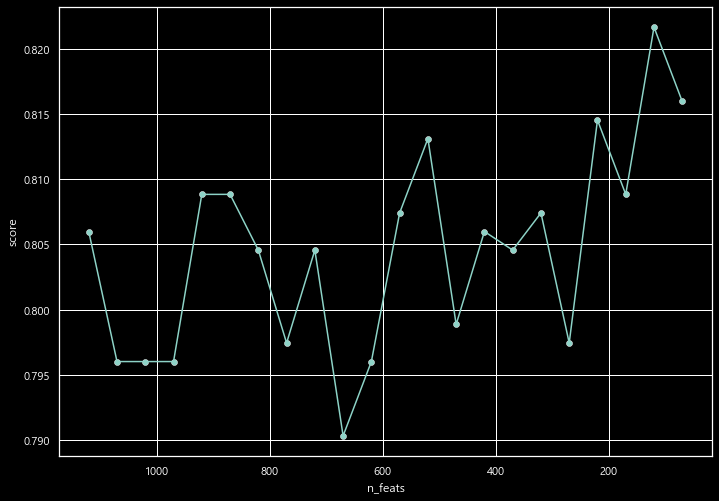

In [107]:
sns.scatterplot(archive['n_feats'],archive['score'])
plt.plot(archive['n_feats'][::-1],archive['score'][::-1])
plt.gca().invert_xaxis()
# plt.ylim(0.5,1)
plt.show()

In [108]:
minmax(archive['score'], digit=3)

(0.79, 0.822)

In [109]:
feats = archive['feats'][np.argmax(archive['score'])]

X_train_new = X_train[feats]
X_valid_new = X_valid[feats]
X_test_new  = X_test[feats]

In [111]:
models = []
iterations = 3000

models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class='ovr', random_state=SEED)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
models.append(('NB', GaussianNB()))  # Gaussian Naive Bayes
models.append(('SVM', SVC(gamma='auto', random_state=SEED)))
models.append(('RFC', RandomForestClassifier(random_state=SEED)))
models.append(('XGBC', XGBClassifier(
    iterations=iterations, verbosity=0, random_state=SEED)))
models.append(('LGBMC', LGBMClassifier(random_state=SEED)))
models.append(('AdaC', AdaBoostClassifier(random_state=SEED)))
models.append(('Cat', CatBoostClassifier(
    iterations=iterations, silent=True, random_state=SEED)))

In [112]:
train_fn = pd.concat([X_train_new,y_train],axis=1)
valid_fn = pd.concat([X_valid_new,y_valid],axis=1)
test_fn  = X_test_new.copy()

In [113]:
X_train_new.shape, X_valid_new.shape, X_test_new.shape

((1634, 120), (701, 120), (9343, 120))

In [114]:
# 11 mins
for name,model in tqdm(models):
    
    model.fit(X_train_new,y_train)
    
    train_fn[f'pred_{name}'] = model.predict(X_train_new)
    valid_fn[f'pred_{name}'] = model.predict(X_valid_new)
    test_fn [f'pred_{name}'] = model.predict(X_test_new)

  0%|          | 0/11 [00:00<?, ?it/s]

In [115]:
tr_acc_list = []
va_acc_list = []

max_name_len = max([len(name) for name,_ in models])
for name,_ in models:
    tr_acc = sum(np.where(train_fn[f'pred_{name}']==train_fn['target'],1,0)) / train_fn.shape[0]
    va_acc = sum(np.where(valid_fn[f'pred_{name}']==valid_fn['target'],1,0)) / valid_fn.shape[0]
    
    tr_acc_list.append(tr_acc)
    va_acc_list.append(va_acc)
    
acc_df = pd.DataFrame({
    'model_name' : [name for name,_ in models],
    'tr_acc' : tr_acc_list,
    'va_acc' : va_acc_list
}).sort_values('va_acc', ascending=False).round(3)

acc_df

,model_name,tr_acc,va_acc
8,LGBMC,1.000,0.826
10,Cat,1.000,0.820
0,LR,0.912,0.813
7,XGBC,1.000,0.805
6,RFC,1.000,0.780
1,LDA,0.742,0.705
9,AdaC,0.797,0.695
4,NB,0.643,0.633
3,CART,1.000,0.556
2,KNN,0.633,0.536


In [116]:
pred_name = ['pred_'+name for name in acc_df['model_name'][:-3]]
print(pred_name)

valid_fn[pred_name].\
    apply(lambda x: x.nunique(), axis=1).\
    value_counts()

['pred_LGBMC', 'pred_Cat', 'pred_LR', 'pred_XGBC', 'pred_RFC', 'pred_LDA', 'pred_AdaC', 'pred_NB']


2    328
1    290
3     76
4      7
dtype: int64

In [117]:
for i in trange(acc_df.shape[0]):

    pred_name = ['pred_'+name for name in acc_df['model_name'][:-i]]
    nunique_list = valid_fn[pred_name].apply(lambda x: x.nunique(), axis=1)
    target_most_freq = valid_fn[pred_name].\
        apply(lambda x:
              x.value_counts().sort_values(ascending=False).index[0],
              axis=1)

    acc = acc_fn(valid_fn['target'],target_most_freq)
    
    print(f'{i} : {acc:.5f}')

  0%|          | 0/11 [00:00<?, ?it/s]

0 : 0.00000
1 : 0.82596
2 : 0.83310
3 : 0.83880
4 : 0.83167
5 : 0.83167
6 : 0.82454
7 : 0.83024
8 : 0.82882
9 : 0.82454
10 : 0.82596


In [ ]:
pred_name = ['pred_'+name for name in acc_df['model_name'][:-3]]

submission = pd.DataFrame({
    'id' : test10.id,
    'target' : test_fn[pred_name].apply(lambda x: x.value_counts().sort_values(ascending=False).index[0], axis=1)
}).sort_values('id')

In [ ]:
submission.to_csv(OUT_PATH + 'submission_ensemble_-3.csv', index=False)

In [ ]:
['pred_'+name for name in acc_df['model_name'][-3:]]

In [ ]:
train_df = train10.copy()
test_df  = test10 .copy()

drop_var = ['id','target'] #+ [col for col in train10.columns if col.find('_id')>=0]
features = setdiff(train_df.columns,drop_var)

X = train_df[features]
y = train_df['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=SEED)
X_test = test_df[features]

In [ ]:
models = []
iterations = 1000

models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class='ovr', random_state=SEED)))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
models.append(('NB', GaussianNB()))  # Gaussian Naive Bayes
# models.append(('SVM', SVC(gamma='auto', random_state=SEED)))
models.append(('RFC', RandomForestClassifier(random_state=SEED)))
models.append(('XGBC', XGBClassifier(
    iterations=iterations, verbosity=0, random_state=SEED)))
models.append(('LGBMC', LGBMClassifier(random_state=SEED)))
models.append(('AdaC', AdaBoostClassifier(random_state=SEED)))
models.append(('Cat', CatBoostClassifier(
    iterations=iterations, silent=True, random_state=SEED)))

In [ ]:
# 32 mins
train_fn = pd.concat([X,y],axis=1)
test_fn  = test_df.copy()

# 11 mins
for name,model in tqdm(models):
    
    model.fit(X,y)
    
    train_fn[f'pred_{name}'] = model.predict(X)
    test_fn [f'pred_{name}'] = model.predict(X_test)

In [ ]:
pred_name = ['pred_'+name for name in acc_df['model_name'][:-3]]

submission = pd.DataFrame({
    'id' : test10.id,
    'target' : test_fn[pred_name].apply(lambda x: x.value_counts().sort_values(ascending=False).index[0], axis=1)
}).sort_values('id')

In [ ]:
submission.to_csv(OUT_PATH + 'submission_ensemble_-3_all.csv', index=False)

In [ ]:
model = lgb.LGBMClassifier(**param_grid)
model.fit(X_train_new, y_train, 
          eval_set=[(X_valid_new, y_valid)], 
          early_stopping_rounds=100, verbose=False)

In [ ]:
y_pred = model.predict(X_valid_new)
acc = np.where(y_pred == y_valid,1,0).sum() / len(y_valid)
print(f'Accuracy : {acc:.3f}')

pd.crosstab(np.array(y_pred),np.array(y_valid))

no scale : 0.780 → 0.826 <br>
minmax :  <br>
standard : 0.805 → 0.817 <br>
robust : 0.807 → 0.820

<br></br>
submission 제출

In [ ]:
y_prob = model.predict(X_test_new)
y_pred = [np.argmax(prob) for prob in y_prob]

In [ ]:
sub_fn = sub2.copy()
sub_fn['target'] = y_pred

sub_fn.to_csv(OUT_PATH + 'submission_lgb_rfe.csv',index=False)

<br></br>
## feature_select + optuna

In [ ]:
start_time = time.time()

# train_ls, test_ls = [],[]
# for seed in range(1,5):

X_train = train10.drop(['id','target'],1)[feats]
X_test  = test10 .drop(['id'],1)[feats]
y_train = train10['target']

#---------------------------------------------------------------------------------------#
# modelling
#---------------------------------------------------------------------------------------#
# larget dataset인 경우, n_split은 3이면 충분함
study = optuna.create_study(direction='maximize', study_name='LGBM Classifier')
func = lambda trial: objective_lgb(trial, X_train, y_train, objective='multiclass', n_split=5, seed = SEED)
study.optimize(func, n_trials=500)

model = lgb.LGBMClassifier(**study.best_params)
model.fit(X_train,y_train) # X_train

end_time = time.time()
running_time = end_time - start_time

In [ ]:
train_df = train10.copy()
test_df  = test10 .copy()

In [ ]:
# seg별 predict값 넣기
train_df['pred'] = model.predict(X_train)
test_df ['pred'] = model.predict(X_test)

print(f'{running_time / 60:.2f} Mins')

In [ ]:
acc_fn(y_train,train_df['pred'])

In [ ]:
sub_fn = sub2
sub_fn['target'] = test_df['pred']

sub_fn.to_csv(OUT_PATH + 'submission_lgb_rfe_optuna3.csv',index=False)

In [ ]:
1. rfe로 feature reduction한것 사용해서 optuna
2. gbdt 말고, dart, goss 써보기
3. n_trials 높여보기

<br></br>
앙상블

In [ ]:
train_df = X_train_new.copy()
valid_df = X_valid_new.copy()
test_df  = X_test_new .copy()

In [ ]:
model_lgb = lgb.LGBMClassifier(**param_grid)
model_lgb.fit(X_train_new, y_train, 
              eval_set=[(X_valid_new, y_valid)], 
              early_stopping_rounds=100, verbose=False)

In [ ]:
model_cat = CatBoostClassifier(iterations=2000)
model_cat.fit(X_train_new, y_train, 
              eval_set=[(X_valid_new, y_valid)], 
              early_stopping_rounds=300, verbose=True)

In [ ]:
model_xgb = XGBClassifier(iterations=10000)
model_xgb.fit(X_train_new, y_train, 
              eval_set=[(X_valid_new, y_valid)], 
              early_stopping_rounds=100, verbose=True)

In [ ]:
train_df['preds_lgb'] = model_lgb.predict(X_train_new)
train_df['preds_cat'] = model_cat.predict(X_train_new).flatten()
train_df['preds_xgb'] = model_xgb.predict(X_train_new)

valid_df['preds_lgb'] = model_lgb.predict(X_valid_new)
valid_df['preds_cat'] = model_cat.predict(X_valid_new).flatten()
valid_df['preds_xgb'] = model_xgb.predict(X_valid_new)

tr_ensemble_df = pd.concat([train_df['preds_lgb'],train_df['preds_cat'],train_df['preds_xgb']],axis=1)
va_ensemble_df = pd.concat([valid_df['preds_lgb'],valid_df['preds_cat'],valid_df['preds_xgb']],axis=1)

train_df['preds_ensemble'] = tr_ensemble_df.apply(lambda x: x.value_counts().sort_values().index[0], axis=1)
valid_df['preds_ensemble'] = va_ensemble_df.apply(lambda x: x.value_counts().sort_values().index[0], axis=1)

print(acc_fn(train_df['preds_lgb'],y_train), acc_fn(train_df['preds_cat'],y_train), acc_fn(train_df['preds_xgb'],y_train), acc_fn(train_df['preds_ensemble'],y_train))
print(acc_fn(valid_df['preds_lgb'],y_valid), acc_fn(valid_df['preds_cat'],y_valid), acc_fn(valid_df['preds_xgb'],y_valid), acc_fn(valid_df['preds_ensemble'],y_valid))

In [ ]:
ensemble_df[ensemble_df.apply(lambda x: len(pd.unique(x)), axis=1)==2]